In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
def get_df(csv_url):
    table = pd.read_csv(csv_url)
    score_arr = []
    label_arr = []

    for i, data in table.iterrows():
        pred_str = data.PredictionString
        pred_list = pred_str.split()
        for j in range(0, len(pred_list), 6):
            label = pred_list[j]
            score = float(pred_list[j + 1])
            score_arr.append(score)
            label_arr.append(label)
    df = pd.DataFrame({"label": label_arr, "score": score_arr})
    ret = df.groupby(df["label"])
    return ret

In [3]:
def draw_graph(ax_list, df, color):
    for label, score in df:
        sns.distplot(score["score"], color=color, ax=ax[int(label)//2, int(label)%2])

In [21]:
def draw_graphs(csv_url_list, ax_list):
    color_list = ["SteelBlue", "DeepPink", "Green", "Olive", "Peru", "Teal", "YellowGreen", "MidnightBlue", "DodgerBlue", "GoldenRod", "DarkSlateBlue"]
    category_names = ['UNKNOWN', 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']

    for i, csv_url in enumerate(csv_url_list):
        df = get_df(csv_url)
        draw_graph(ax_list, df, color_list[i])
        if i == 0:
            for label, _ in df:
                ax[int(label)//2, int(label)%2].set_title(category_names[int(label)])


In [22]:
csv_list = [
            # "/content/drive/MyDrive/boostcamp/stage_3_det/stage3_det_ensemble/kimin/0519_ensemble/universe101_fold2_5559.csv",
            # "/content/drive/MyDrive/boostcamp/stage_3_det/stage3_det_ensemble/kimin/0519_ensemble/universe101_swa_fold0_5769.csv",
            # "/content/drive/MyDrive/boostcamp/stage_3_det/stage3_det_ensemble/kimin/0519_ensemble/universe101_swa_fold1_5726.csv",
            # "/content/drive/MyDrive/boostcamp/stage_3_det/stage3_det_ensemble/kimin/0519_ensemble/universe101_swa_fold3_5727.csv",
            # "/content/drive/MyDrive/boostcamp/stage_3_det/stage3_det_ensemble/kimin/0519_ensemble/universe101_swa_fold4_5767.csv",
            # "/content/drive/MyDrive/boostcamp/stage_3_det/stage3_det_ensemble/kimin/all_csv/universe101_fold2_5559.csv",
            # "/content/drive/MyDrive/boostcamp/stage_3_det/stage3_det_ensemble/kimin/최종/swins_alldata_6013.csv",
            "/content/drive/MyDrive/boostcamp/stage_3_det/stage3_det_ensemble/final.csv"
]
label = ["1 stage", "2 stage", "Ensemble"]

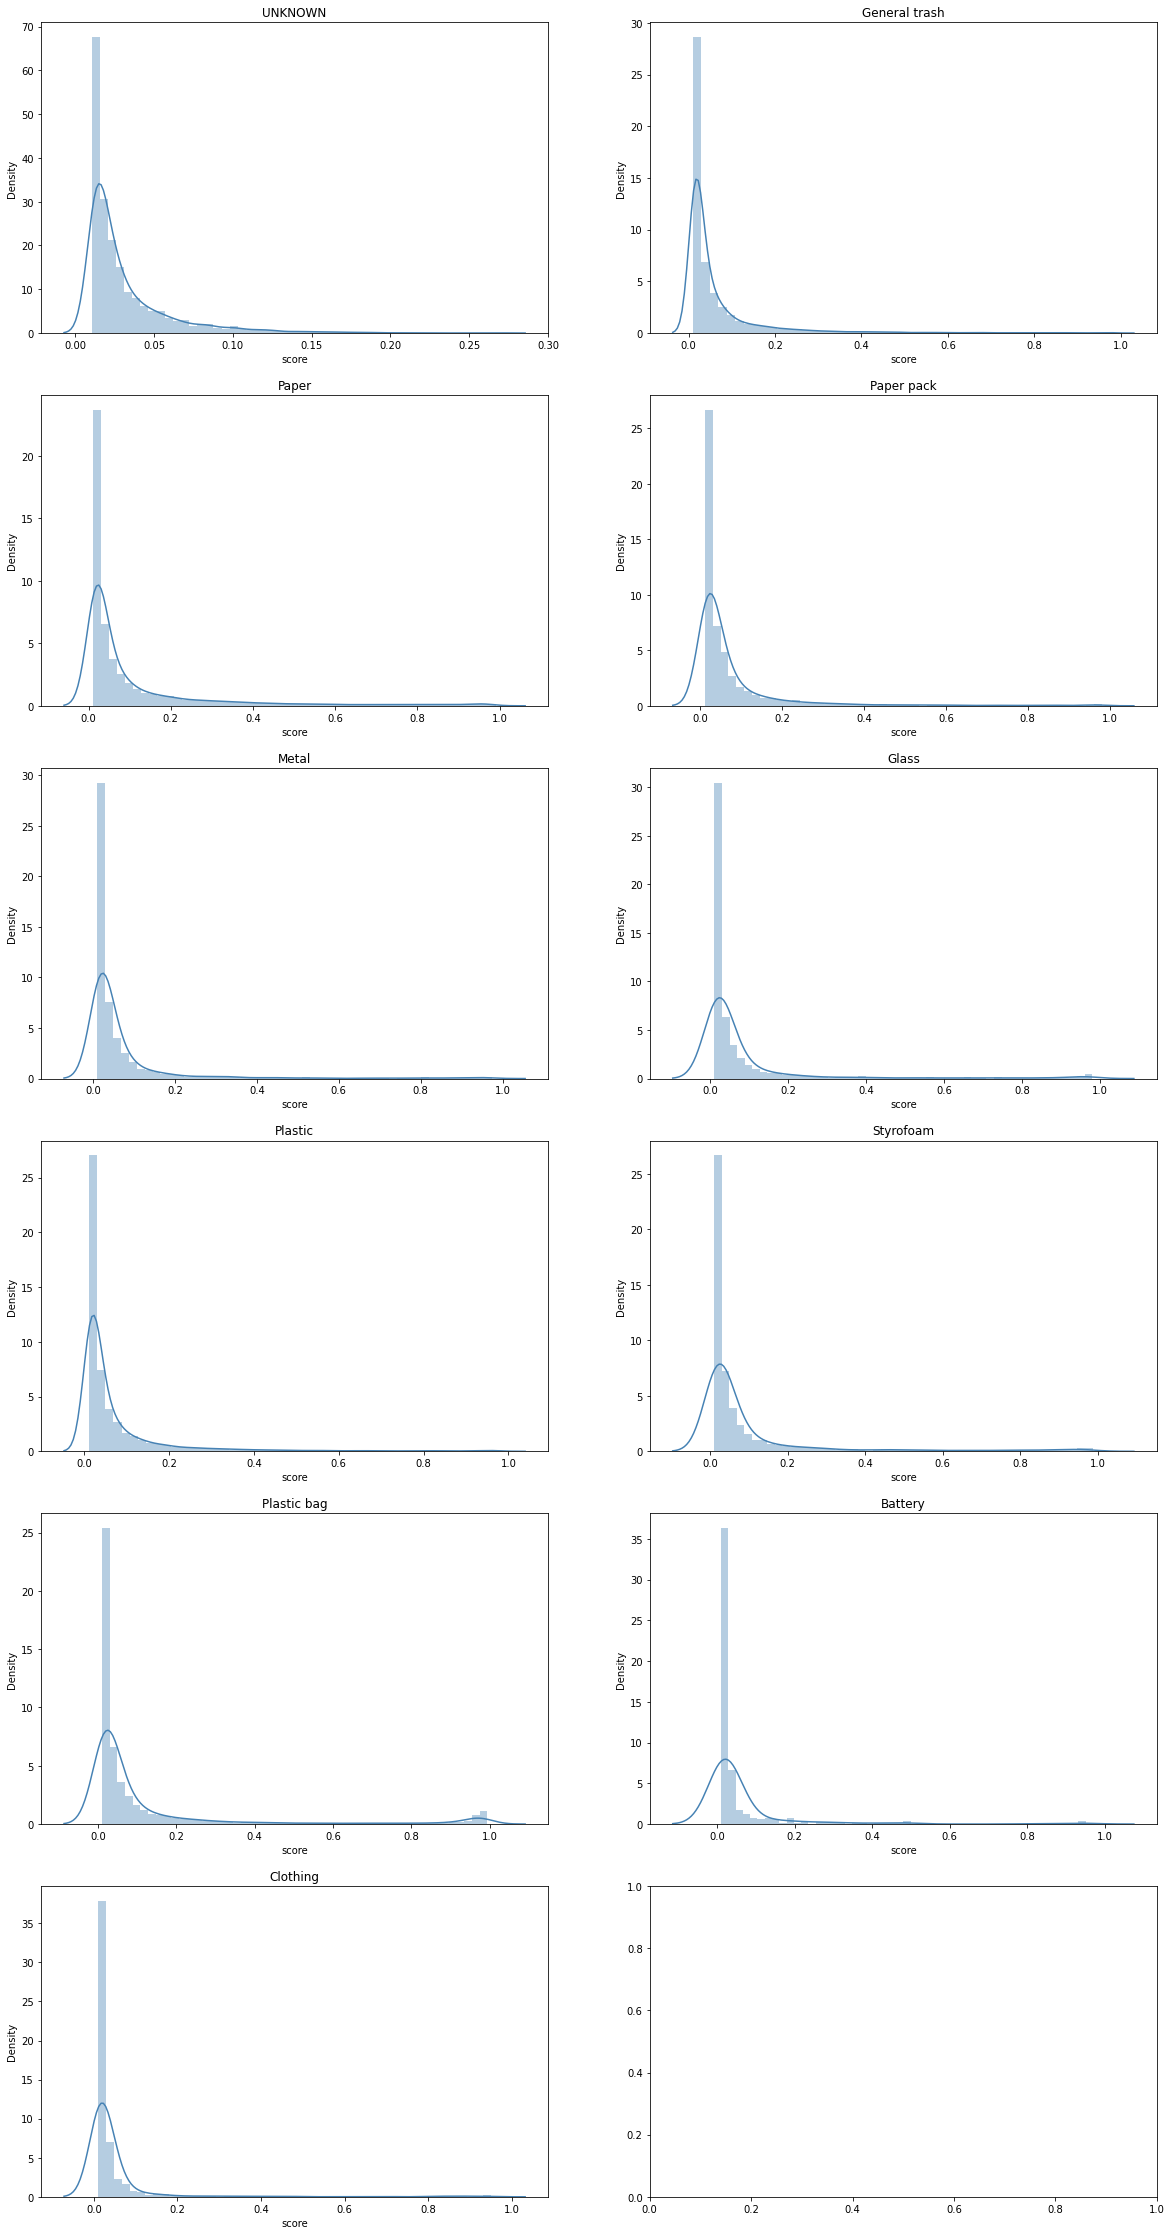

In [23]:
fig, ax = plt.subplots(nrows=6, ncols= 2, figsize=(20, 40))
draw_graphs(csv_list, ax)
plt.show()